In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [2]:
data = pd.read_csv("authors_raw.csv", low_memory=False)
data.head()

,_id,name,article_id,org,gid,oid,orgid,sid,email,orgs,orcid,bio,name_zh,org_zh,oid_zh,orgs_zh,position,avatar,homepage
0,53f45728dabfaec09f209538,Peijuan Wang,53e99784b7602d9701f3e133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5601754345cedb3395e59457,Jiahua Zhang,53e99784b7602d9701f3e133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53f38438dabfae4b34a08928,Donghui Xie,53e99784b7602d9701f3e133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5601754345cedb3395e5945a,Yanyan Xu,53e99784b7602d9701f3e133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53f43d25dabfaeecd6995149,Yun Xu,53e99784b7602d9701f3e133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
statistics_by_column = {
    'column': [],
    "% null": [],
    "count": []
}

for cur_columns in data.columns:
    statistics_by_column["% null"].append(data[cur_columns].isna().sum()/len(data)*100)
    statistics_by_column["count"].append(len(data))
    statistics_by_column["column"].append(cur_columns)

dataframe_stat = pd.DataFrame(data = statistics_by_column)
dataframe_stat.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
column,_id,name,article_id,org,gid,oid,orgid,sid,email,orgs,orcid,bio,name_zh,org_zh,oid_zh,orgs_zh,position,avatar,homepage
% null,20.960364,0.038995,0.0,40.029143,70.501989,99.297335,52.038734,78.905908,87.149386,65.219277,94.056009,97.529374,99.984204,99.976309,99.998586,99.990891,100.0,99.764718,99.999982
count,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979,16478979


Параметры: 

        `homepage`; 
        `avatar`; 
        `position`; 
        `orgs_zh`; 
        `org_zh`; 
        `oid_zh`;
        `name_zh`;
        `bio`; 
        `orcid`;        
        `oid`;
Содержат > 95% значений `NaN` 

In [91]:
data.drop(['homepage', 'avatar', 'position', 'orgs_zh', 'org_zh', 'oid_zh', 'name_zh', 'bio', 'orcid' , 'oid'], axis=1, inplace=True)

In [92]:
data.groupby('_id').nunique()

,name,article_id,org,gid,orgid,sid,email,orgs
_id,,,,,,,,
53f3186ddabfae9a84425c58,3,8,1,1,1,1,1,1
53f3186fdabfae9a84425cde,1,7,1,1,1,0,0,0
53f3186fdabfae9a84425cfb,1,1,1,1,1,0,0,0
53f31870dabfae9a84425d19,1,1,1,1,0,0,1,1
53f31870dabfae9a84425d53,2,2,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...
607e70884c775e0497f5ba0c,1,3,1,1,1,1,0,0
607faeae4c775e0497f5f003,2,14,7,2,2,4,0,5
608031c74c775e0497f6016d,6,42,15,5,5,6,3,8


параметры:
        `email`;
        `sid`;
        `orgid`;
        `gid`;
содержат  `NaN` в более чем половине случаев, но по смыслу не несут пользы для создания рекомендательной сиситемы по соавторству. не помогают идетифицировать автора без id, т.к. меняются у одного и того же автора


Будм рассматривать поля
        `_id`;
        `name`;
        `article_id`;
        `org`;
        `orgs`;

In [3]:
data=data[['_id', 'name', 'article_id', 'org', 'orgs']]

# ID автора

20% записей об авторах не имеют ID

In [95]:
len(data[data['_id'].isnull() & -data['name'].isnull() ]['name'])/len(data)

0.2092207897103334

Не понятно как определять уникального автора без его id

нет возможности достоверно восстановить все его статьи

не целесообразно пытаться "склеивать" авторов, т.к. их метаданные могут меняться постоянно, ноприме организация

In [96]:
data[data['_id'].isnull() & -data['name'].isnull() ]['name'].value_counts()[:5]

Xin Li      1279
Yang Liu    1204
Wei Wang     863
Li Li        666
Yu Wang      610
Name: name, dtype: int64

In [97]:
data[data['name']=='Xin Li'][:10]

,_id,name,article_id,org,orgs
41165,NaN,Xin Li,53e997ddb7602d9701fd4147,"Computers and Software School, Communication U...",NaN
62194,NaN,Xin Li,53e997f8b7602d9702000d50,arizona state university,NaN
63186,NaN,Xin Li,53e997f9b7602d9702002fb2,"Department of Mathematics, University of Scien...","['Department of Mathematics, University of Sci..."
66145,NaN,Xin Li,53e997fcb7602d9702009e4f,"Department of Computer Science, University of ...","['Department of Computer Science, University o..."
66153,NaN,Xin Li,53e997fcb7602d9702009e5a,"Department of Computer Science, University of ...","['Department of Computer Science, University o..."
87156,NaN,Xin Li,53e99818b7602d9702031e09,University of Washington,"['Univ Washington, Seattle, WA 98195 USA']"
106850,NaN,Xin Li,53e99833b7602d97020591fa,NaN,NaN
112849,NaN,Xin Li,53e9983db7602d9702067351,University of Illinois at Urbana-Champaign,NaN
121535,542be99fdabfae2b4e1b6ed3,Xin Li,53e99846b7602d97020787fa,University of Science and Technology of China,NaN
127025,5601c28945cedb3395eb6fbd,Xin Li,53e9984fb7602d970208510e,NaN,NaN


поэтому удалим из рассмотрения всех авторов без id

In [4]:
data=data[-data['_id'].isnull()]

# Распределение сколько статей публикует один автор 

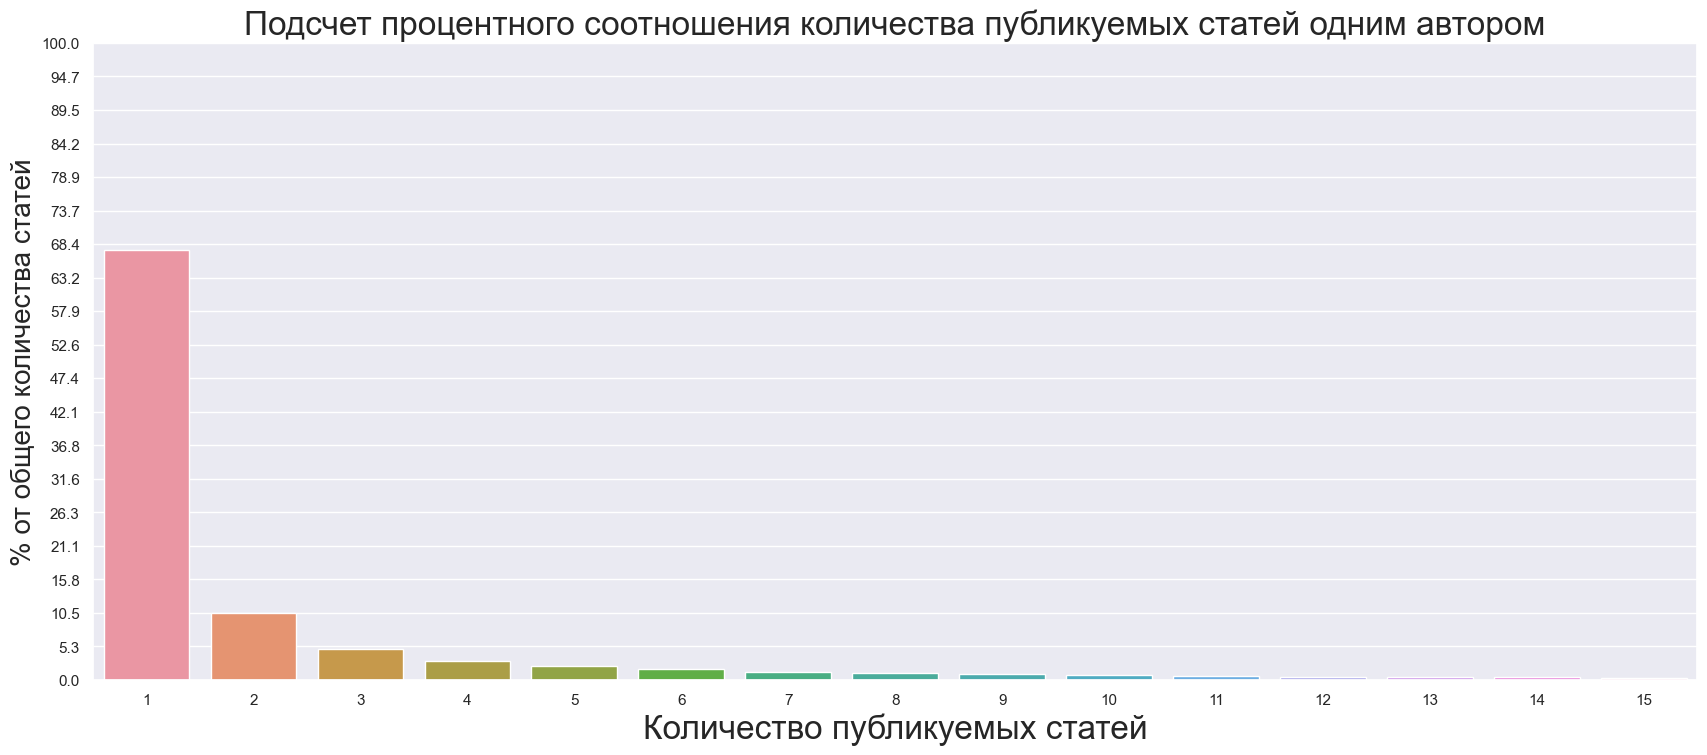

In [99]:
percent_articles_published_authors=data["_id"].value_counts().to_frame().value_counts(normalize=True)
x = []
y = []

for cur_ind in percent_articles_published_authors.index.tolist():
    x.append(cur_ind[0])

for idx in range(len(percent_articles_published_authors)):
    y.append(percent_articles_published_authors.iloc[idx] * 100)

d = {'Количество публикуемых статей':x[:15],
    "% от общего количества статей":y[:15]}

barplot_ = sns.barplot(x="Количество публикуемых статей", y="% от общего количества статей", data=pd.DataFrame(data=d))
barplot_.set_title('Подсчет процентного соотношения количества публикуемых статей одним автором', fontsize=24)
barplot_.set_xlabel("Количество публикуемых статей",fontsize=24)
barplot_.set_ylabel("% от общего количества статей",fontsize=20)
barplot_.set_yticks(np.linspace(0, 100, num=20))
plt.show()

<AxesSubplot: ylabel='Frequency'>

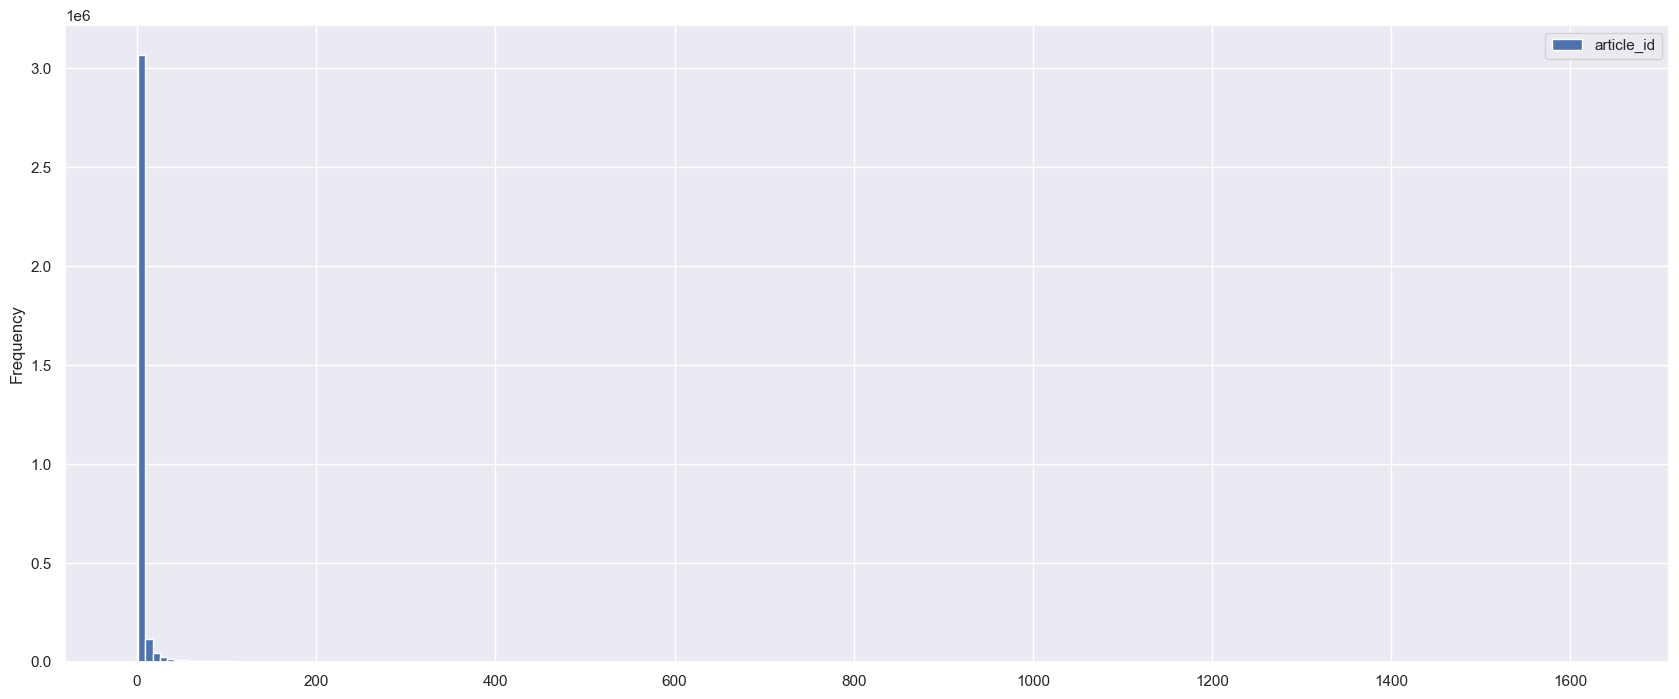

In [10]:
cnt_auth=data[['_id', 'article_id']].groupby('_id').count()
cnt_auth.plot.hist(bins=200)

# Распределение сколько статей публикует одна организация

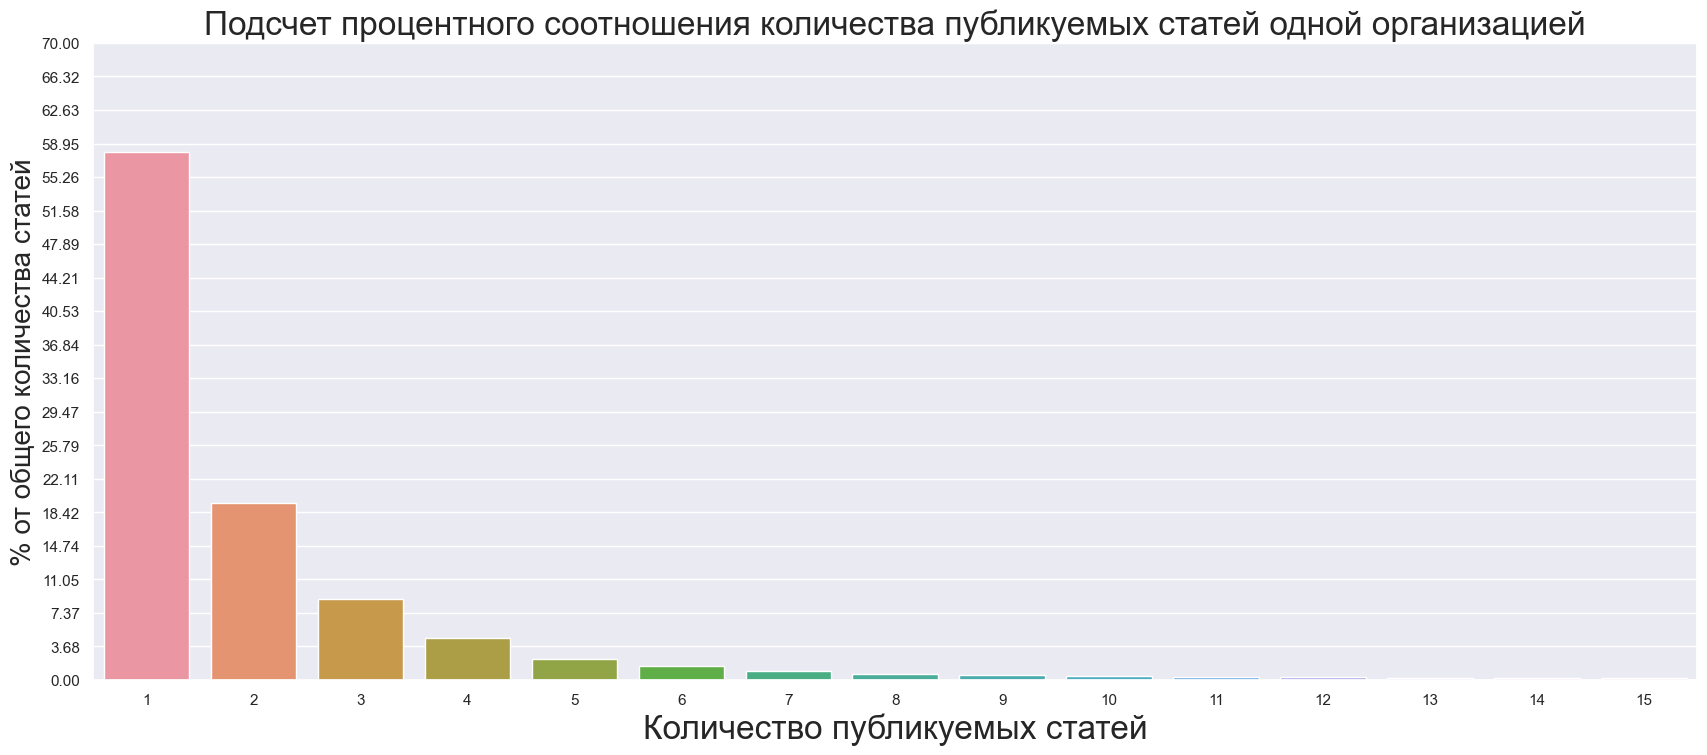

In [100]:
num_published_articles = data["org"].value_counts().to_frame().value_counts(normalize=True)
x = []
y = []

for cur_ind in num_published_articles.index.tolist():
    x.append(cur_ind[0])

for idx in range(len(num_published_articles)):
    y.append(num_published_articles.iloc[idx] * 100)

d = {
        'Количество публикуемых статей':x[:15],
        "% от общего количества статей":y[:15]
    }
barplot_=sns.barplot(x="Количество публикуемых статей", y="% от общего количества статей", data=pd.DataFrame(data=d)) 
barplot_.set_title('Подсчет процентного соотношения количества публикуемых статей одной организацией', fontsize=24)
barplot_.set_xlabel("Количество публикуемых статей",fontsize=24)
barplot_.set_ylabel("% от общего количества статей",fontsize=20)
barplot_.set_yticks(np.linspace(0, 70, num=20))
plt.show()

<AxesSubplot: ylabel='Frequency'>

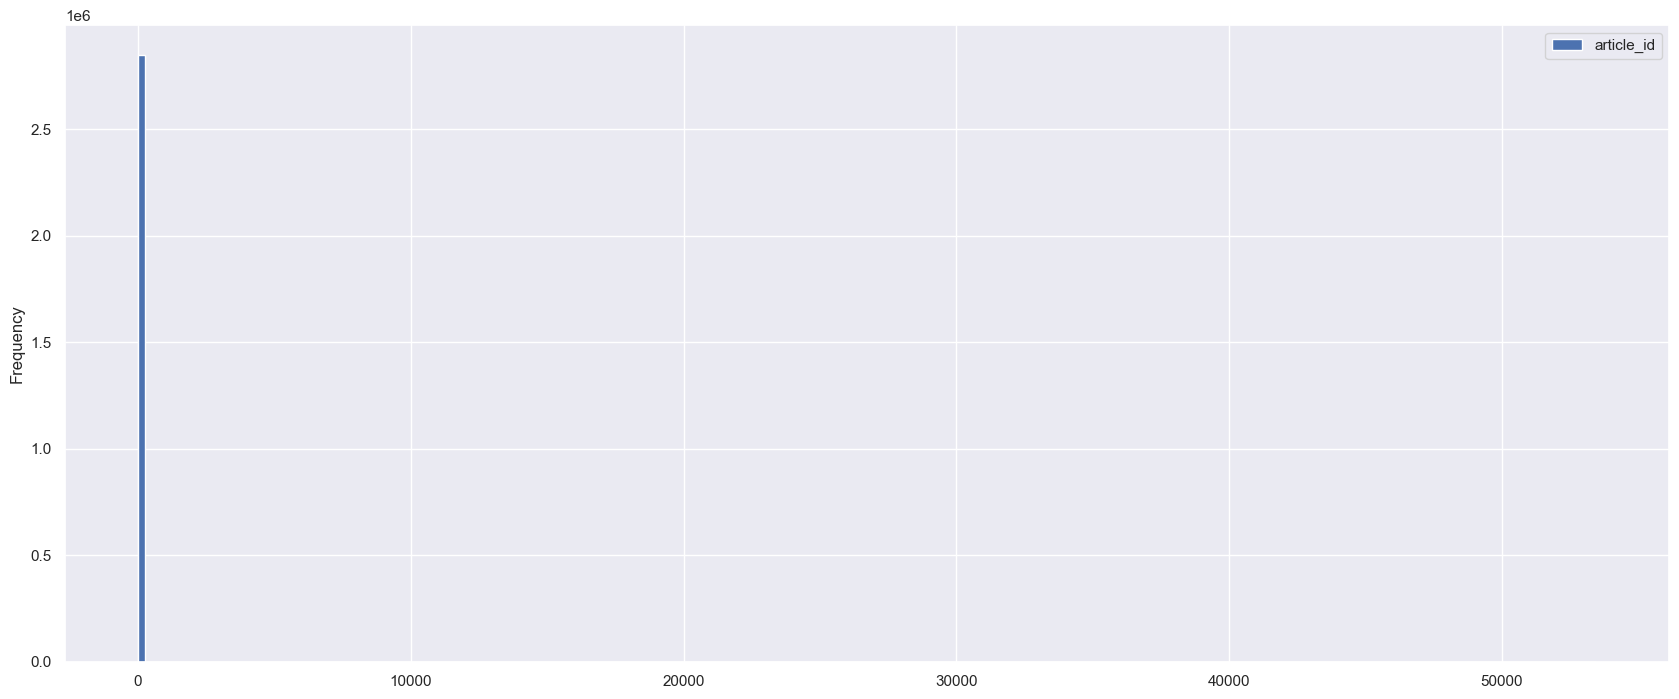

In [12]:
cnt_org=data[['org', 'article_id']].groupby('org').count()
cnt_org.plot.hist(bins=200)

# Количество авторов на одну статью

In [13]:
article=pd.read_csv('main_table.csv')
article=article[['_id']]
article.rename(columns={"_id": "article_id"}, inplace=True)


article=article.join(data.set_index('article_id'), on='article_id', how='left')

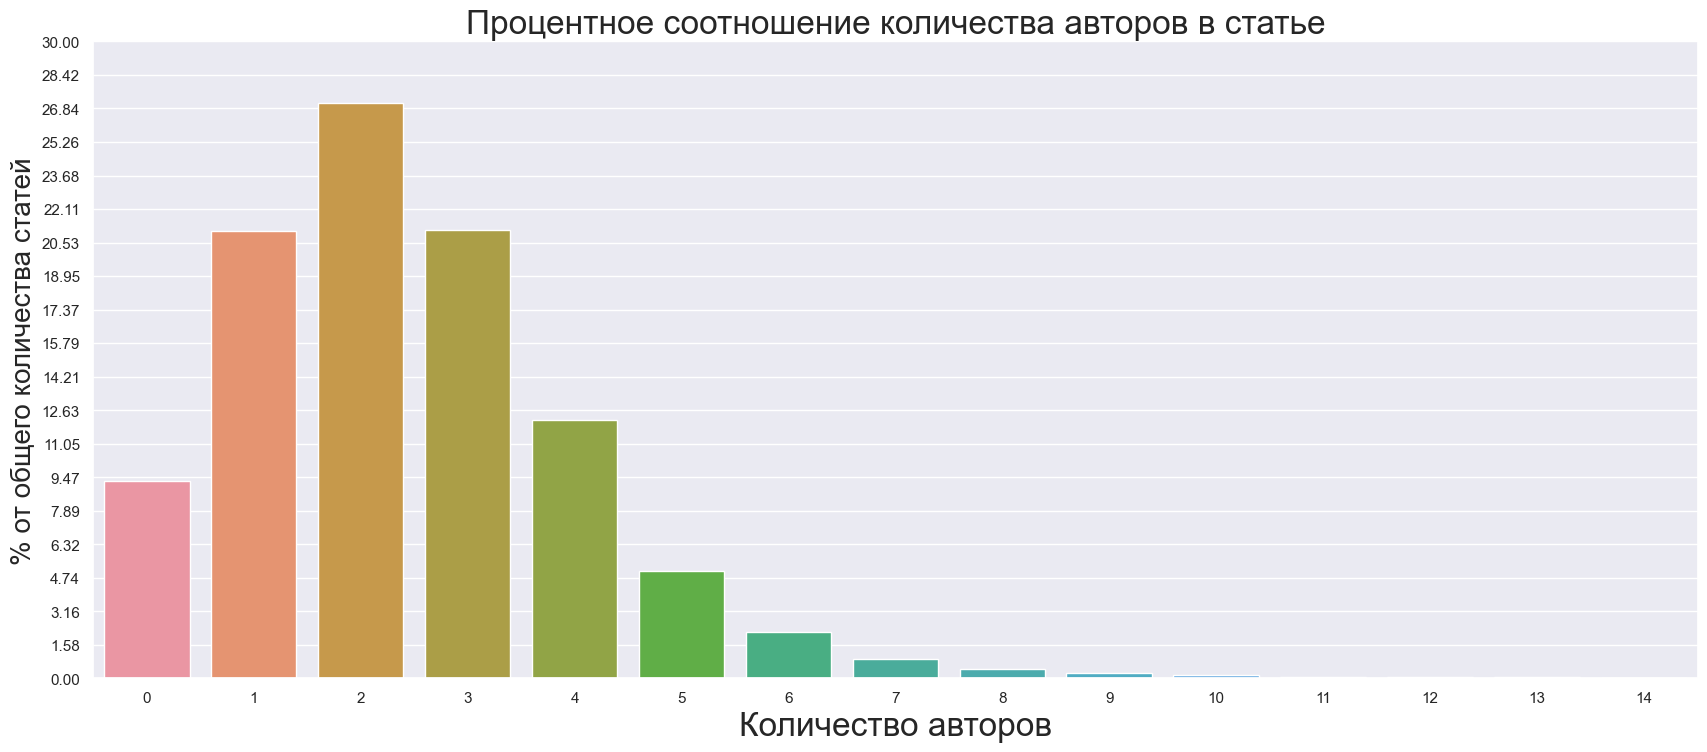

In [6]:

num_authors_of_articles = article[['article_id', '_id']].groupby('article_id').count().value_counts(normalize=True)
x = []
y = []

for cur_ind in num_authors_of_articles.index.tolist():
    x.append(cur_ind[0])

for idx in range(len(num_authors_of_articles)):
    y.append(num_authors_of_articles.iloc[idx] * 100)

d = {
        'Количество авторов': x[:15],
        "% от общего количества статей": y[:15]
    }
barplot_=sns.barplot(x="Количество авторов", y="% от общего количества статей", data=pd.DataFrame(data=d)) 
barplot_.set_title('Процентное соотношение количества авторов в статье', fontsize=24)
barplot_.set_xlabel("Количество авторов",fontsize=24)
barplot_.set_ylabel("% от общего количества статей",fontsize=20)
barplot_.set_yticks(np.linspace(0, 30, num=20))
#barplot_.set_xticks(np.linspace(0, 10, num=10))
plt.show()

C:\Users\mrnik\MADE\project\lib\site-packages\pandas\plotting\_matplotlib\core.py:808: UserWarning: The label '_id' of <matplotlib.patches.Rectangle object at 0x000001BA991FFEE0> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot: ylabel='Frequency'>

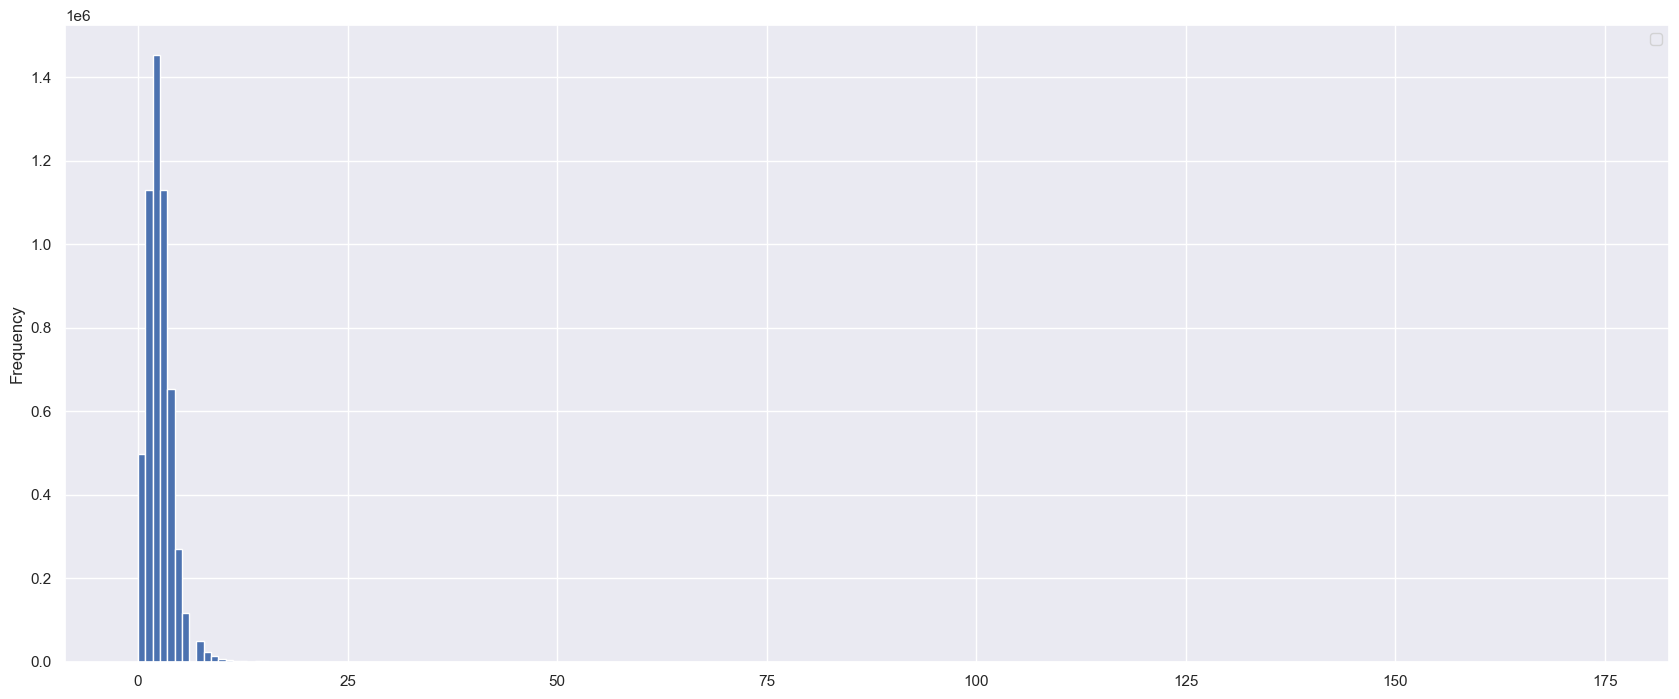

In [14]:
cnt_auth=article[['article_id', '_id']].groupby('article_id').count()
cnt_auth.plot.hist(bins=200)

# имеет ли значение организация автора

In [8]:
data_join=data.join(data.set_index('article_id'), on='article_id',
                       how='left', lsuffix='left', rsuffix='right', sort=False, validate=None)
data_join=data_join[data_join['_idleft']>data_join['_idright']]
data_join['the_same_org']=data_join.apply(lambda x: 1 if x.orgleft==x.orgright else 0,  axis=1)

In [9]:
data_join['the_same_org'].mean()

0.2728636606342033

из всевозможны пар соавторов по статьям 27% работают в одной организации

In [10]:
x=data_join[['article_id', 'the_same_org' ]].groupby('article_id', as_index=False).mean()

In [11]:
len(x[x['the_same_org']>0])/len(x)

0.4138909320727649

41% статей с 2-мя и более авторами имеют хотя бы одну пару соавторов из одной организации

это 28 % от общего числа статей

Поэтому будем хранить информацию обо всех организациях автора